In [1]:
def gini_index(groups, classes):

    n_instances = float(sum([len(group) for group in groups]))

    gini = 0.0
    for group in groups:
        size = float(len(group))

        if size == 0:
            continue
        score = 0.0

        for class_val in classes:
            p = [row[-1] for row in group].count(class_val) / size
            score += p * p

        gini += (1.0 - score) * (size / n_instances)
    return gini

In [2]:
def test_split(index, value, dataset):
    left, right = list(), list()
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

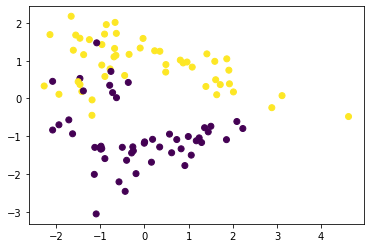

In [25]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

x_train, y_train = make_classification(n_samples=100, n_features=2, n_informative=2,
                                      n_redundant=0, n_classes=2, n_clusters_per_class=2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)


In [26]:
dataset = x_train.tolist()
y = y_train.tolist()

for i in dataset:
    for j in y:
        i.append(j)
        y.remove(j)
        break

In [5]:
def get_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    b_index, b_value, b_score, b_groups = 999, 999, 999, None
    for index in range(len(dataset[0])-1):
        for row in dataset:
            groups = test_split(index, row[index], dataset)
            gini = gini_index(groups, class_values)
            print('X%d < %.3f Gini=%.3f' % ((index+1), row[index], gini))
            if gini < b_score:
                b_index, b_value, b_score, b_groups = index, row[index], gini, groups
    return {'index':b_index, 'value':b_value, 'groups':b_groups}

In [29]:
split = get_split(dataset)

X1 < 1.362 Gini=0.484
X1 < 1.294 Gini=0.489
X1 < -0.966 Gini=0.500
X1 < 0.568 Gini=0.500
X1 < -1.659 Gini=0.499
X1 < -0.676 Gini=0.499
X1 < 1.392 Gini=0.478
X1 < 0.350 Gini=0.497
X1 < 0.877 Gini=0.496
X1 < -0.636 Gini=0.495
X1 < -1.627 Gini=0.500
X1 < -1.010 Gini=0.498
X1 < -0.721 Gini=0.499
X1 < -1.459 Gini=0.498
X1 < 2.884 Gini=0.485
X1 < -0.690 Gini=0.500
X1 < 2.093 Gini=0.499
X1 < -1.186 Gini=0.489
X1 < -0.983 Gini=0.500
X1 < -0.778 Gini=0.499
X1 < -1.712 Gini=0.500
X1 < -0.576 Gini=0.495
X1 < -1.610 Gini=0.499
X1 < 1.858 Gini=0.491
X1 < 0.965 Gini=0.496
X1 < -1.461 Gini=0.498
X1 < 1.613 Gini=0.478
X1 < -2.079 Gini=0.490
X1 < 0.732 Gini=0.498
X1 < -0.895 Gini=0.499
X1 < -0.758 Gini=0.498
X1 < 1.505 Gini=0.481
X1 < -0.501 Gini=0.497
X1 < 1.240 Gini=0.492
X1 < 0.232 Gini=0.497
X1 < -0.988 Gini=0.499
X1 < -0.191 Gini=0.500
X1 < 1.925 Gini=0.493
X1 < -0.895 Gini=0.500
X1 < 1.445 Gini=0.487
X1 < -2.139 Gini=0.495
X1 < 0.831 Gini=0.498
X1 < 0.487 Gini=0.499
X1 < -1.246 Gini=0.495
X1 < 1.

In [30]:
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

In [31]:
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])

    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return

    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return

    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)

    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)

In [32]:
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

In [33]:
def print_tree(node, depth=0):
    if isinstance(node, dict):
        print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
        print_tree(node['left'], depth+1)
        print_tree(node['right'], depth+1)
    else:
        print('%s[%s]' % ((depth*' ', node)))

In [48]:
tree = build_tree(dataset, 3, 1)

X1 < 1.362 Gini=0.484
X1 < 1.294 Gini=0.489
X1 < -0.966 Gini=0.500
X1 < 0.568 Gini=0.500
X1 < -1.659 Gini=0.499
X1 < -0.676 Gini=0.499
X1 < 1.392 Gini=0.478
X1 < 0.350 Gini=0.497
X1 < 0.877 Gini=0.496
X1 < -0.636 Gini=0.495
X1 < -1.627 Gini=0.500
X1 < -1.010 Gini=0.498
X1 < -0.721 Gini=0.499
X1 < -1.459 Gini=0.498
X1 < 2.884 Gini=0.485
X1 < -0.690 Gini=0.500
X1 < 2.093 Gini=0.499
X1 < -1.186 Gini=0.489
X1 < -0.983 Gini=0.500
X1 < -0.778 Gini=0.499
X1 < -1.712 Gini=0.500
X1 < -0.576 Gini=0.495
X1 < -1.610 Gini=0.499
X1 < 1.858 Gini=0.491
X1 < 0.965 Gini=0.496
X1 < -1.461 Gini=0.498
X1 < 1.613 Gini=0.478
X1 < -2.079 Gini=0.490
X1 < 0.732 Gini=0.498
X1 < -0.895 Gini=0.499
X1 < -0.758 Gini=0.498
X1 < 1.505 Gini=0.481
X1 < -0.501 Gini=0.497
X1 < 1.240 Gini=0.492
X1 < 0.232 Gini=0.497
X1 < -0.988 Gini=0.499
X1 < -0.191 Gini=0.500
X1 < 1.925 Gini=0.493
X1 < -0.895 Gini=0.500
X1 < 1.445 Gini=0.487
X1 < -2.139 Gini=0.495
X1 < 0.831 Gini=0.498
X1 < 0.487 Gini=0.499
X1 < -1.246 Gini=0.495
X1 < 1.

In [49]:
print_tree(tree)

[X2 < -0.479]
 [X1 < 1.362]
  [X1 < 1.294]
   [0]
   [0]
  [X1 < 1.362]
   [0]
   [0]
 [X2 < 0.748]
  [X1 < 0.482]
   [1]
   [1]
  [X1 < -0.966]
   [1]
   [1]
